In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [5]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)
    
    ### START CODE HERE ###
    for i in range(X.shape[0]):
          distance=[]
          for j in range (K):
              dist=np.linalg.norm(X[i] - centroids[j])
              distance.append(dist)

          idx[i]=np.argmin(distance)
     

    ### END CODE HERE ###
    
    return idx
    

In [6]:
X = load_data()

In [7]:
initial_centroids = np.array([[3,3], [6,2], [8,5]])


idx = find_closest_centroids(X, initial_centroids)


print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 2 1]


In [11]:
def compute_centroids(X, idx, K):
  
    m, n = X.shape
    
    centroids = np.zeros((K, n))

    for k in range(K):
        point_sum = 0 
        count = 0 
        for i in range(m):
            if idx[i] == k:
                point_sum      += X[i]
                count += 1
        
        if count > 0: 
            centroids[k] = point_sum / count  
    
    return centroids


In [12]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)


The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [13]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
   
    
   
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    
    for i in range(max_iters):
        
        
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


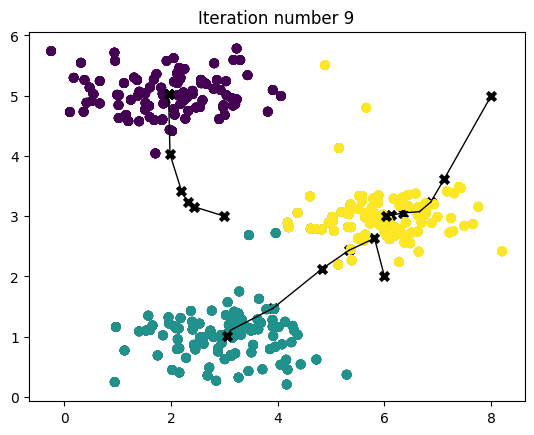

[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


In [15]:
X = load_data()


initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3


max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)
print(centroids)

In [16]:
def kMeans_init_centroids(X, K):
   
    
    
    randidx = np.random.permutation(X.shape[0])
    
  
    centroids = X[randidx[:K]]
    
    return centroids

In [17]:
original_img = plt.imread('bird_small.png')

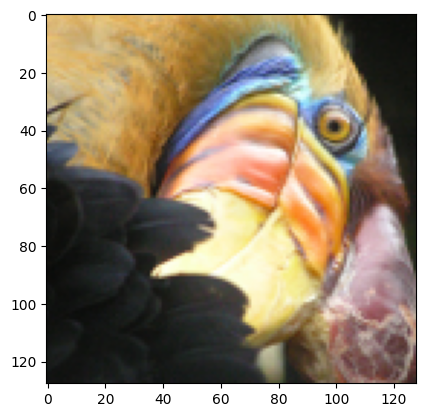

In [18]:
plt.imshow(original_img)

In [19]:
original_img = original_img / 255
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [20]:
K = 16                       
max_iters = 10               


initial_centroids = kMeans_init_centroids(X_img, K) 


centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [21]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [ 6 15 15  6  6]


In [22]:
X_recovered = centroids[idx, :] 


X_recovered = np.reshape(X_recovered, original_img.shape) 

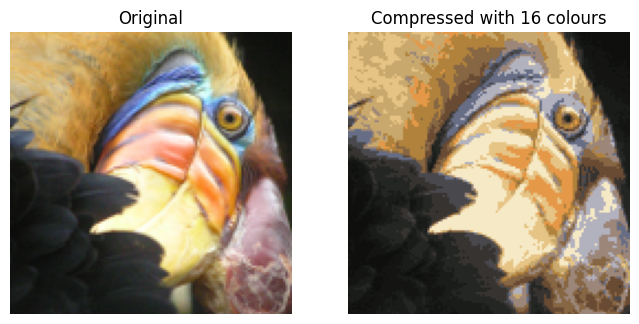

In [23]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()